In [1]:
!pip install pandas

In [3]:
!pip install numpy

In [5]:
!pip install matplotlib seaborn

In [7]:
!pip install scipy

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [11]:
!pip install statsmodels

In [13]:
import statsmodels.api as sm

In [18]:
df = pd.read_csv('Taxi Datset.csv')

In [22]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [24]:
df.shape

(11916667, 18)

In [26]:
#EDA 

df.dtypes

VendorID                  object
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [28]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [30]:
df.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [32]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [34]:
df['duration'] = df['duration'].dt.total_seconds()/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916662,2{,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916663,"""error"" : true",NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916664,"""message"" : ""Internal error""",NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11916665,"""status"" : 500",NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# new data
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [38]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000
...,...,...,...,...,...
11916662,NaN,NaN,NaN,NaN,NaN
11916663,NaN,NaN,NaN,NaN,NaN
11916664,NaN,NaN,NaN,NaN,NaN
11916665,NaN,NaN,NaN,NaN,NaN


In [40]:
df.isnull().sum()

passenger_count    91453
payment_type       91453
fare_amount            5
trip_distance          5
duration               5
dtype: int64

In [ ]:
# if null val present than use ( (value/len(df))*100 , df.dropna(inplace = True)

In [42]:
(91453/len(df))*100

0.7674377407709723

In [44]:
df.dropna(inplace = True)

In [46]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
11916657,1.0,1.0,7.0,1.27,7.216667
11916658,1.0,3.0,16.0,3.80,20.033333
11916659,1.0,1.0,9.5,2.06,10.716667
11916660,1.0,1.0,12.5,3.70,11.333333


In [48]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [50]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
11916657,1,1,7.0,1.27,7.216667
11916658,1,3,16.0,3.80,20.033333
11916659,1,1,9.5,2.06,10.716667
11916660,1,1,12.5,3.70,11.333333


In [52]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
11916654,1,1,9.5,2.20,9.316667
11916655,1,2,8.0,1.92,7.050000
11916657,1,1,7.0,1.27,7.216667
11916659,1,1,9.5,2.06,10.716667


In [54]:
df.drop_duplicates(inplace = True)

In [56]:
df.shape

(4772511, 5)

In [58]:
# removing 0 passenger / payment cabs

df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.566941
2    0.191656
3    0.069630
5    0.066722
6    0.042873
4    0.038591
0    0.023566
7    0.000010
8    0.000006
9    0.000005
Name: proportion, dtype: float64

In [60]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.746287e-01
2    3.094834e-01
3    9.620931e-03
4    6.266722e-03
5    2.095333e-07
Name: proportion, dtype: float64

In [62]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [64]:
df.shape

(4384114, 5)

In [66]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

In [68]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
11916649,1,Card,20.5,6.90,14.016667
11916650,1,Cash,52.0,20.82,40.650000
11916652,2,Card,8.5,1.47,9.150000
11916656,4,Card,19.5,4.88,23.933333


In [70]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,4.384114e+06,4.384114e+06,4.384114e+06,4.384114e+06
mean,1.770477e+00,1.903468e+01,4.919532e+00,2.643348e+01
std,1.202354e+00,1.542316e+01,5.079359e+00,9.940648e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-9.990667e+03
25%,1.000000e+00,9.500000e+00,1.640000e+00,1.083333e+01
50%,1.000000e+00,1.450000e+01,3.050000e+00,1.708333e+01
75%,2.000000e+00,2.300000e+01,6.190000e+00,2.510000e+01
max,5.000000e+00,4.265000e+03,3.699400e+02,8.525117e+03


In [72]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x2c6faa74350>,
 'caps': [<matplotlib.lines.Line2D at 0x2c6faa74980>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c6978c7bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c6faa74fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c6faa75310>],
 'means': []}

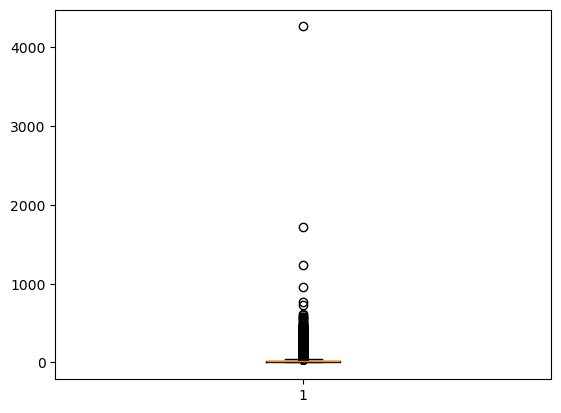

In [74]:
plt.boxplot(df['fare_amount'])

In [76]:
#remove outliers, using IQR

for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [78]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
11916640,1,Card,12.5,2.44,18.416667
11916649,1,Card,20.5,6.90,14.016667
11916652,2,Card,8.5,1.47,9.150000
11916656,4,Card,19.5,4.88,23.933333


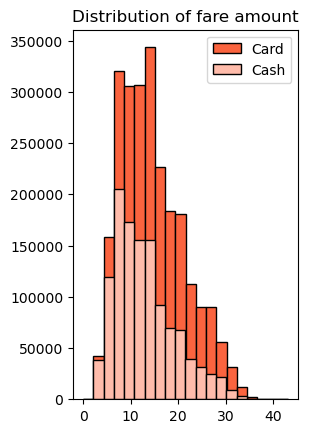

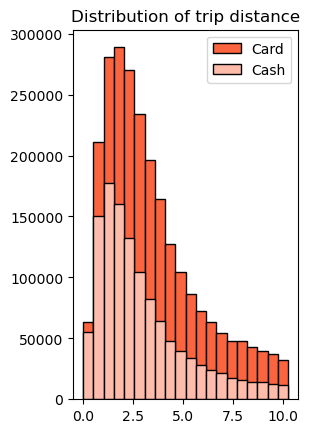

In [80]:
# plot for comparing which type is used more card or cash , based on distance (using histogram)

plt.figure(figure=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()


plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

In [82]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           14.558159  6.713283      3.452158  2.359884
Cash           12.862998  6.356535      2.952691  2.234004

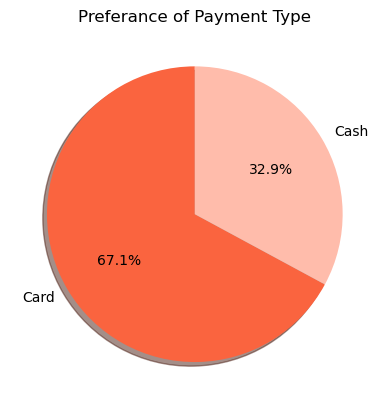

In [84]:
# card std and mean is more, use pich chat to show preferance of card or cash by users

plt.title('Preferance of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
       startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

In [86]:
# pay for passengers per cab
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                        1415166
             2                         523863
             3                         204856
             4                         110244
             5                         209634
Cash         1                         722561
             2                         253080
             3                          92784
             4                          55794
             5                          82849

In [88]:
# convert in %

passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [90]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [92]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1415166,38.551652
1,Card,2,523863,14.270965
2,Card,3,204856,5.580644
3,Card,4,110244,3.003244
4,Card,5,209634,5.710805
5,Cash,1,722561,19.683854
6,Cash,2,253080,6.894352
7,Cash,3,92784,2.527602
8,Cash,4,55794,1.519928
9,Cash,5,82849,2.256955


In [94]:
df_pivot = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df_pivot['payment_type'] = ['Card', 'Cash']
df_pivot.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df_pivot.iloc[1,1:] = passenger_count.iloc[5:,-1]
df_pivot

,payment_type,1,2,3,4,5
0,Card,38.551652,14.270965,5.580644,3.003244,5.710805
1,Cash,19.683854,6.894352,2.527602,1.519928,2.256955


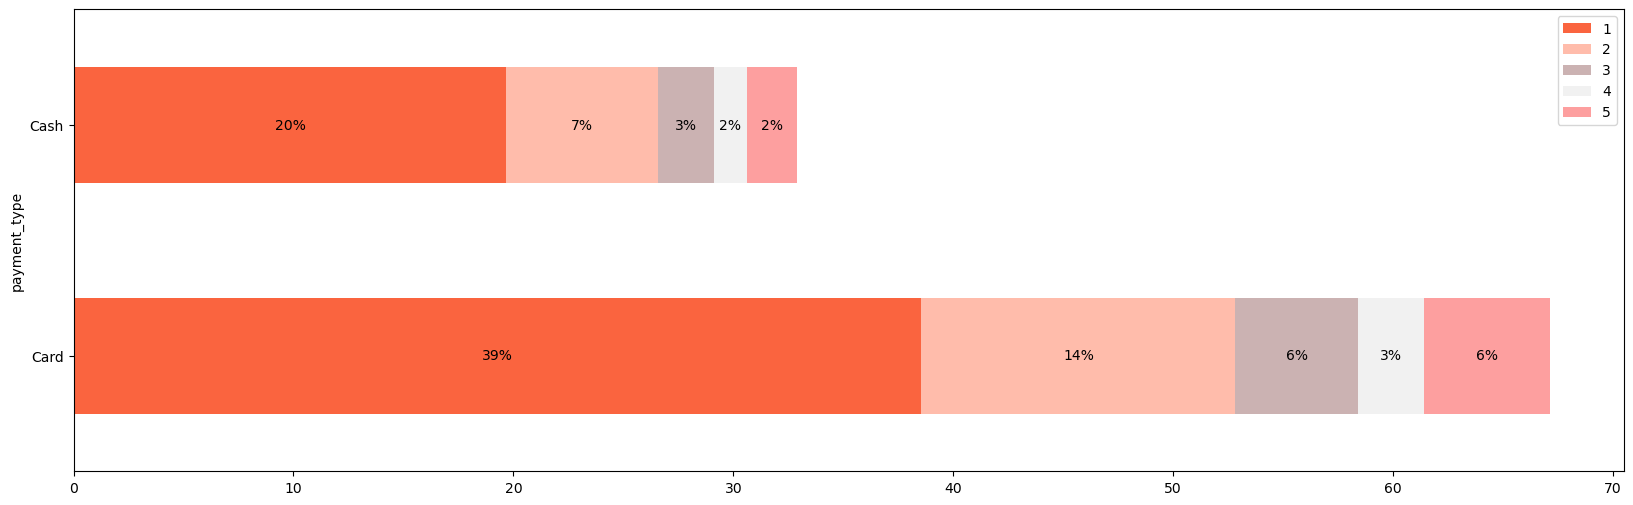

In [96]:
fig, ax = plt.subplots(figsize=(20,6))
df_pivot.plot(x= 'payment_type', kind = 'barh', stacked = True, ax= ax, color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
           y + height / 2,
           '{:.0f}%'.format(width),
           horizontalalignment='center',
           verticalalignment='center')

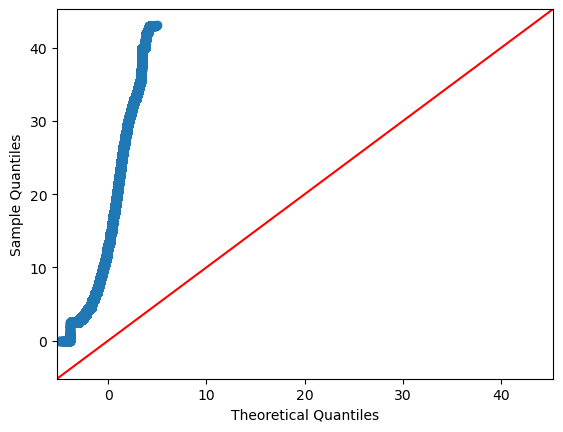

In [98]:
sm.qqplot(df['fare_amount'], line='45')
plt.show()

In [100]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [102]:
# use hypothesis T_test (H0 = no difference between payment type, H1 = difference in payment type...(cash,card) )

t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistic', t_stats, 'p_value',p_value)

T statistic 235.6059801575388 p_value 0.0


In [ ]:
# p value < 0.05, so reject H0.